# "[DRAFT] Titanic dataset"
> "Quick EDA/Plots & Machine Learning"

- toc: true
- badges: false
- comments: false
- author: Yannick
- categories: [EDA, ML]

# Setup

In [1]:
%%capture
!pip install kaggle --upgrade

In [2]:
%%capture
import os
from getpass import getpass
kaggle_username = input("Kaggle USERNAME : ")
os.environ['KAGGLE_USERNAME'] = kaggle_username
kaggle_key = getpass("Kaggle KEY for "+os.environ.get('KAGGLE_USERNAME')+": ")
os.environ["KAGGLE_KEY"] = kaggle_key

Kaggle USERNAME : yannick42
Kaggle KEY for yannick42: ··········


In [3]:
!kaggle competitions download -c titanic -p my_data
!cd my_data && unzip titanic.zip

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 19.7MB/s]
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [4]:
#hide
# Search for another dataset ...
# !kaggle datasets list -s sentiment

In [5]:
# .kaggle
# my_data\gender_submission.csv
# my_data\test.csv
# my_data\train.csv
!ls -la my_data

total 136
drwxr-xr-x 2 root root  4096 Apr 29 16:19 .
drwxr-xr-x 1 root root  4096 Apr 29 16:19 ..
-rw-r--r-- 1 root root  3258 Dec 11  2019 gender_submission.csv
-rw-r--r-- 1 root root 28629 Dec 11  2019 test.csv
-rw-r--r-- 1 root root 34877 Apr 29 16:19 titanic.zip
-rw-r--r-- 1 root root 61194 Dec 11  2019 train.csv


# Load data + transformations

In [6]:
import pandas as pd

# Pandas basics : https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html

def feature_eng(df):

  # drop useless columns
  df.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)

  # Gender: str -> int
  gender = {'male': 1, 'female': 2} 
  df['Sex'] = [gender[item] for item in df['Sex']]

  # Fill missing values with mean
  df['Age'].fillna((df['Age'].mean()), inplace=True)
  #df['Fare'].fillna((df['Fare'].mean()), inplace=True)

  # see recommendations by https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/
  df['Age*Class'] = df['Age'] * df['Pclass']
  df['SibSp'].fillna(0, inplace=True) # Number of Siblings/Spouses Aboard
  df['Parch'].fillna(0, inplace=True) # Number of Parents/Children Aboard
  df['Family_Size'] = df['SibSp'] + df['Parch']
  df['Fare_Per_Person'] = df['Fare'] / (df['Family_Size'] + 1)

  df.Embarked.fillna(0, inplace=True) # unknown embarkation place
  embarked = {'S': 1, 'C': 2, 'Q': 3, 0: 0} # Southampton (UK, Apr 10th), Cherbourg (France, Apr 10th), Queenstown ("Ireland"..., Apr 11th)
  df['Embarked'] = [embarked[item] for item in df['Embarked']]

  return df

###
### TRAIN DATA (+Transformations)
###
df = pd.read_csv('my_data/train.csv')
df = feature_eng(df)
#print(df.describe())

###
### TEST DATA (+Transformations)
###
df_test = pd.read_csv('my_data/test.csv')
df_test = feature_eng(df_test)
#df_test.describe()

# General informations

The Titanic departed from Southampton on April 10th, to Cherbourg, to Queenstown (the 11th). She sinked the 15th of April 1912

In [7]:

# the 13 youngest deads below 5 y.o. :(
df[(df.Survived == 0) & (df.Age <= 5)].sort_values(by='Age')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age*Class,Family_Size,Fare_Per_Person
164,0,3,"Panula, Master. Eino Viljami",1,1.0,4,1,39.6875,NaN,1,3.0,5,6.614583
386,0,3,"Goodwin, Master. Sidney Leonard",1,1.0,5,2,46.9000,NaN,1,3.0,7,5.862500
7,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,21.0750,NaN,1,6.0,4,4.215000
16,0,3,"Rice, Master. Eugene",1,2.0,4,1,29.1250,NaN,3,6.0,5,4.854167
119,0,3,"Andersson, Miss. Ellis Anna Maria",2,2.0,4,2,31.2750,NaN,1,6.0,6,4.467857
205,0,3,"Strom, Miss. Telma Matilda",2,2.0,0,1,10.4625,G6,1,6.0,1,5.231250
297,0,1,"Allison, Miss. Helen Loraine",2,2.0,1,2,151.5500,C22 C26,1,2.0,3,37.887500
642,0,3,"Skoog, Miss. Margit Elizabeth",2,2.0,3,2,27.9000,NaN,1,6.0,5,4.650000
824,0,3,"Panula, Master. Urho Abraham",1,2.0,4,1,39.6875,NaN,1,6.0,5,6.614583
374,0,3,"Palsson, Miss. Stina Viola",2,3.0,3,1,21.0750,NaN,1,9.0,4,4.215000


# Plots

## Pie Charts

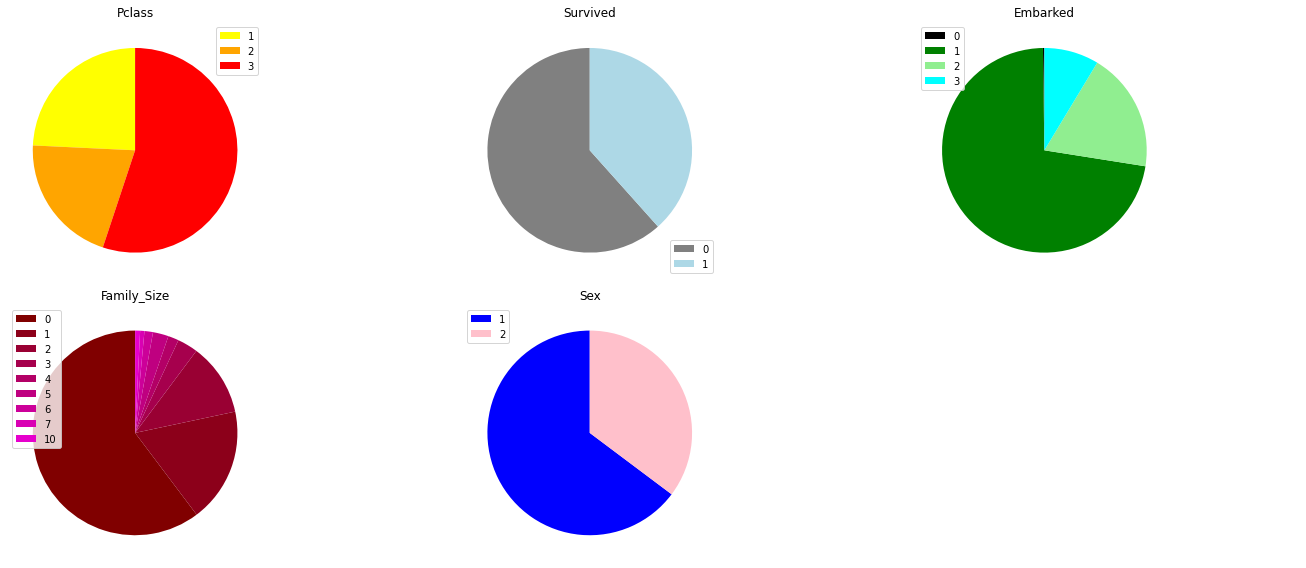

In [8]:
#collapse-hide

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

row = 2
col = 3

fig, ax = plt.subplots(row, col, figsize=(20,8))

list_columns = ['Pclass', 'Survived', 'Embarked', 'Family_Size', 'Sex', None]

# to generate a gradient of colors
colors = [(.5, 0, 0), (1, 0, 1)] # from first color to the last
cm = LinearSegmentedColormap.from_list("Custom", colors, N=11) # 11 shades

colors = [
  ['yellow', 'orange', 'red'],
  ['grey', 'lightblue'],
  ['black', 'green', 'lightgreen', 'cyan'],
  cm(np.linspace(0, 1, num=11)), # equally "spaced" 11 colors...
  ['blue', 'pink'],
]

i = 0
for column in list_columns:

  axis = ax[i//col][i%(row+1)]
  if column is None:
    axis.axis('off') # hide
  else:
    s = df.groupby([column]).size().to_frame('size').reset_index()
    
    axis.set_title(column)
    # plot pie chart
    patches, texts = axis.pie(s['size'], colors=colors[i], startangle=90)
    # add a legend
    axis.legend(patches, s[column].unique(), loc="best")
  i=i+1

plt.tight_layout()

## Scatterplot

4 numerical variables in one scatterplot : x=Age / y=Fare / color=Pclass : Survived or not

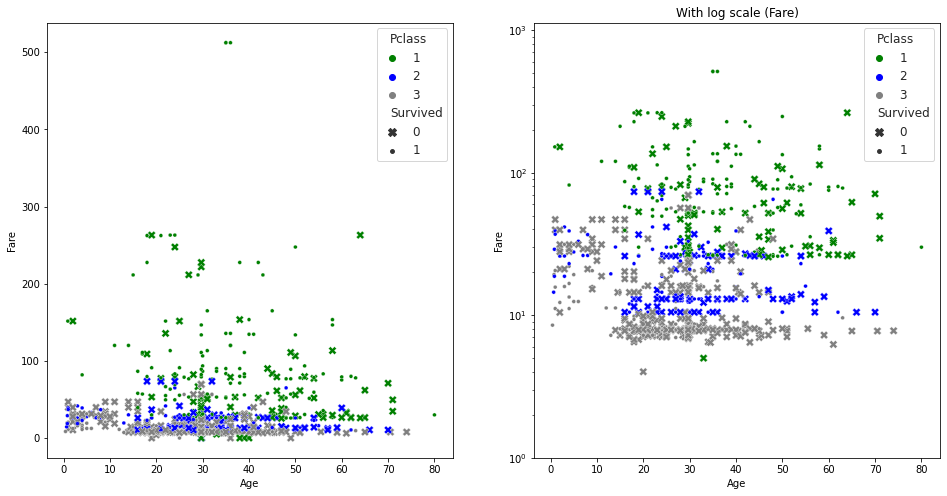

In [9]:
#collapse-hide

from matplotlib.pyplot import figure
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(16,8))

sns.set(style="whitegrid")

markers = {0: "X", 1: "o"}
sns.scatterplot(
    ax=ax[0],
    data=df,
    x="Age",
    y="Fare",
    hue="Pclass",
    palette=['green','blue','grey'],
    style="Survived",
    size="Survived",
    sizes=(15, 65),
    markers=markers
)

# same with log scale
s = sns.scatterplot(
    ax=ax[1],
    data=df,
    x="Age",
    y="Fare",
    hue="Pclass",
    palette=['green','blue','grey'],
    style="Survived",
    size="Survived",
    sizes=(15, 65),
    markers=markers
);
s.set_yscale("log")
s.set_title("With log scale (Fare)")
ticks = [1, 10, 100, 1000]
s.set_yticks(ticks);


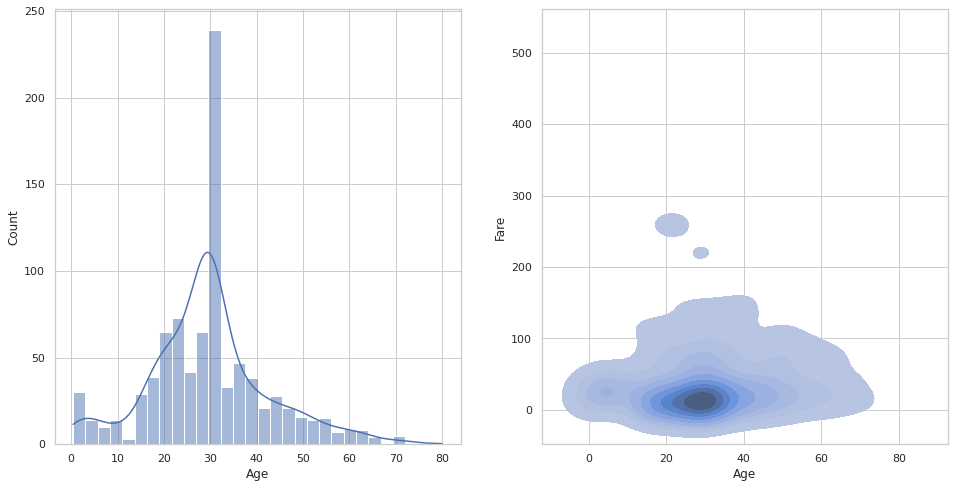

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))

sns.histplot(ax=ax[0], data=df, x="Age", kde=True)
sns.kdeplot(ax=ax[1], data=df, x="Age", y="Fare", fill=True);

## Ridgeline plot

Age distributions per passenger class

In [11]:
%%capture
!pip install joypy

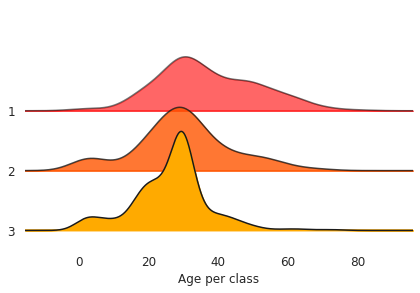

In [12]:
#collapse-hide
from joypy import joyplot
import matplotlib.pyplot as plt
from matplotlib import cm

joyplot(df, by='Pclass', column='Age', colormap=cm.autumn, fade = True)
plt.xlabel("Age per class")
plt.show()

# Fisher's exact tests

Test for independence's results : Male are dying more often than Female (obvious fact)

In [13]:
from scipy.stats import fisher_exact

cross = pd.crosstab(df['Sex'], df['Survived']) # women (2) survived "greater" ?
print(cross)
print("-"*30)

oddsr, p = fisher_exact(table=cross.to_numpy(), alternative='greater')
print("odds ratio :", oddsr)
print("p-value :", p)


Survived    0    1
Sex               
1         468  109
2          81  233
------------------------------
odds ratio : 12.3506625891947
p-value : 3.5925132664684234e-60


Test for independence's results : Young people are dying less than adults (quite obvious fact)

In [14]:
from scipy.stats import fisher_exact

cross = pd.crosstab(df['Age'] >= 18, df['Survived']) # adults survived less ?
print(cross)
print("-"*30)

oddsr, p = fisher_exact(table=cross.to_numpy(), alternative='less')
print("odds ratio :", oddsr)
print("p-value :", p)


Survived    0    1
Age               
False      52   61
True      497  281
------------------------------
odds ratio : 0.4819738100735561
p-value : 0.00023180674713449813


# Fares

Distributions of fares + means per passenger class

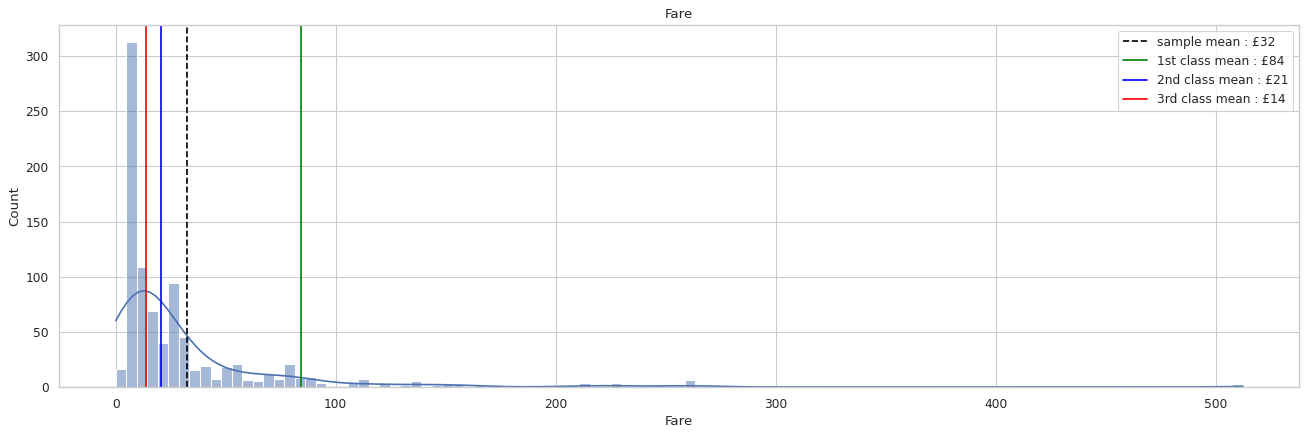

In [15]:
#collapse-hide

figure(figsize=(20, 6), dpi=80)

column = 'Fare'
sample_mean = df[column].mean()

ax = sns.histplot(df[column], kde=True)
ax.set_title(column)

#
# Show PClass averages
#
firstClassFare = df.query('Pclass == 1')[column]
secondClassFare = df.query('Pclass == 2')[column]
thirdClassFare = df.query('Pclass == 3')[column]
firstClassMean = firstClassFare.mean()
secondClassMean = secondClassFare.mean()
thirdClassMean = thirdClassFare.mean()
# Means positions
plt.axvline(sample_mean, 0, 1, color='black', linestyle='dashed', label="sample mean : £"+str(round(sample_mean)))
plt.axvline(firstClassMean, 0, 1, color='green', label="1st class mean : £"+str(round(firstClassMean)))
plt.axvline(secondClassMean, 0, 1, color='blue', label="2nd class mean : £"+str(round(secondClassMean)))
plt.axvline(thirdClassMean, 0, 1, color='red', label="3rd class mean : £"+str(round(thirdClassMean)))
plt.legend();


## Z-test

Does the fare of surviving women (respectively men) was significantly higher fare of all women (respectively men) ?

We use a z-test instead of t-test, because the sample is bigger than 30, even if the distributions appear somewhat skewed and not entirely "normal" ... (??)

In [19]:
#collapse-hide

import statsmodels.api as sm

column = 'Fare'

sample_mean = df[column].mean()
print("MEAN fare : £"+str(round(sample_mean, 2)))

# sample mean & std on the surviving people
survivors_sample_mean = df.query('Survived == 1')[column].mean()
print("MEAN fare of surviving people : £"+str(round(survivors_sample_mean, 2)))

for gender in [1, 2]:

  gender_name = 'men' if gender == 1 else 'women'
  print()
  print("*"*15+" "+gender_name.upper()+" "+"*"*15)

  gender_sample_mean = df.query('Sex == '+str(gender))[column].mean()
  gender_survivors_sample_mean = df.query('Survived == 1 & Sex == '+str(gender))[column].mean()
  gender_survivors_sample_std = df.query('Survived == 1 & Sex == '+str(gender))[column].std(ddof=1) # already 1 by default ...

  print("MEAN fare of "+gender_name+" : £"+str(round(gender_sample_mean, 2)))
  print("MEAN fare of surviving "+gender_name+" : £"+str(round(gender_survivors_sample_mean, 2)))
  print("-> Standard Deviation :", round(gender_survivors_sample_std, 2))
  print("-"*30)

  # Eg. "Is the **surviving women**'s fare, significantly **larger** than all women ?""
  ztest, probability_value = sm.stats.ztest( # weightstats ?
      df.query('Sex == '+str(gender)+' & Survived == 1')[column], # x1 : one-sample test
      x2=None, # only for two-sample tests
      value=gender_sample_mean, # the mean of x1 "under the null hypothesis" (of all survivors)
      alternative="larger" # smaller|larger
  )

  print("z-score :", ztest)
  print("p-value :", probability_value)
  print("-"*30)

  if probability_value < 0.05:
    print("Null hyphothesis is rejected => Alternative hyphothesis ACCEPTED")
    print("=> Surviving "+gender_name+" are SIGNIFICANTLY more the "+gender_name+" who paid the highest")
  else:
    print("Null hyphothesis accepted ! the alternative hyphothesis REJECTED")
    print("=> Surviving "+gender_name+" are NOT necessarily the "+gender_name+" who paid the highest")


MEAN fare : £32.2
MEAN fare of surviving people : £48.4

*************** MEN ***************
MEAN fare of men : £25.52
MEAN fare of surviving men : £40.82
-> Standard Deviation : 71.36
------------------------------
z-score : 2.238236626512455
p-value : 0.012602814173932239
------------------------------
Null hyphothesis is rejected => Alternative hyphothesis ACCEPTED
=> Surviving men are SIGNIFICANTLY more the men who paid the highest

*************** WOMEN ***************
MEAN fare of women : £44.48
MEAN fare of surviving women : £51.94
-> Standard Deviation : 64.1
------------------------------
z-score : 1.7761147467986738
p-value : 0.03785700304513003
------------------------------
Null hyphothesis is rejected => Alternative hyphothesis ACCEPTED
=> Surviving women are SIGNIFICANTLY more the women who paid the highest


# Classification

Logistic regression for binary classification, to determine survival chances

See : https://notes.yannick42.dev/logreg/

adult    712
young     95
kid       44
older     40
Name: Age, dtype: int64
most represented age class: adult
******************************
Train accuracy : 0.8233532934131736
Test accuracy : 0.8026905829596412
Chance of survival of this profile [age, fare, pclass, family_size, sex, adult, older] = [25, 20, 2, 0, 1, 1, 0]  :  22 %


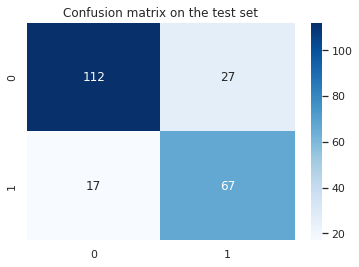

In [99]:
#collapse-hide
"""
https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

https://stats.stackexchange.com/questions/48360/is-standardization-needed-before-fitting-logistic-regression

"""

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

df['Adult_Male'] = (df['Age'] >= 18) & (df['Sex'] == 1)
df['Older'] = (df['Age'] >= 55)

# Age classes
age_class = pd.cut(df['Age'], bins=[0, 5, 18, 55, 80], labels=['kid', 'young', 'adult', 'older'])
print(age_class.value_counts())
print("most represented age class:", age_class.mode()[0])
print("*"*30)

X = df[['Age', 'Fare', 'Pclass', 'Family_Size', 'Sex', 'Adult_Male', 'Older']]
y = df['Survived']

# final dataset
#print(X)

# split in train/test sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.25)

###############################
# Learn !
log_reg = LogisticRegression(solver="liblinear") # lbfgs outputs warnings... slow convergence :/ (I should standardize data ?)
clf = log_reg.fit(X_train, y_train)
print("Train accuracy :", clf.score(X_train, y_train))

###############################
# Predictions
y_pred = clf.predict(X_test)

print("Test accuracy :", accuracy_score(y_pred, y_test))

# Confusion matrix
ax = sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt='d', cmap=cm.Blues);
ax.set_title("Confusion matrix on the test set")

###############################
# Predict a profile
profile1 = [
              25,  # y.o.
              20,  # Fare
              2,   # Pclass
              0,   # Family_Size
              1,   # Sex (1=Male)
              1,   # Adult male ?
              0    # Older ?
          ]
result = clf.predict_proba([profile1])
print("Chance of survival of this profile [age, fare, pclass, family_size, sex, adult, older] =", profile1, " : ", round(result[0][1]*100), "%")

In [ ]:
#hide

%matplotlib inline

choose = "XGB"  # Ridge

# MODELS
import xgboost as xgb
from sklearn.linear_model import Ridge

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to find hyperparameters
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

nb_split = 8

X = df.loc[:, ['Pclass', 'Sex', 'Fare', 'Age*Class', 'Family_Size', 'Fare_Per_Person']]
y = df['Survived']


# ==> DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
splited = np.array_split(X, nb_split)
X_validation_test = pd.DataFrame(splited[0])
X = pd.DataFrame(np.concatenate(splited[1:]))

ysplited = np.array_split(y, nb_split)
y_validation_test = pd.DataFrame(ysplited[0])
y = pd.DataFrame(np.concatenate(ysplited[1:]))






# X_validation_set = df_test.loc[:, ['Pclass', 'Sex', 'Fare', 'Age*Class', 'Family_Size', 'Fare_Per_Person']]
# dtrain = xgb.DMatrix(X.to_numpy(), y.to_numpy())
# dtest = xgb.DMatrix(X_validation_set.to_numpy())
# specify parameters via map
# param = {'max_depth':6, 'eta':1, 'objective':'binary:logistic' }
# num_round = 6
# bst = xgb.train(param, dtrain, num_round)

if choose == "XGB":

  # About log loss : https://medium.datadriveninvestor.com/understanding-the-log-loss-function-of-xgboost-8842e99d975d
  xgb_model = xgb.XGBClassifier(eval_metric="logloss")

  # best found : {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100}
  optimization_dict = {
    'max_depth': [6], #[4, 6, 8],
    'n_estimators': [100], #[50, 100, 200],
    'learning_rate': [0.01], #[0.001, 0.01, 0.1]
  }
  model = GridSearchCV(xgb_model, optimization_dict, scoring='accuracy', verbose=1)

elif choose == "Ridge":

  ridge_model = Ridge()
  # best found : {'alpha': ?}
  optimization_dict = {
    'alpha': [0.001, 0.01, 0.1]
  }
  model = GridSearchCV(ridge_model, optimization_dict, scoring='accuracy', verbose=1)



print("X (shape) : ", X.shape)
print("y (shape) : ", y.shape)
model.fit(X.to_numpy(), y.to_numpy().ravel())

# Results
print("Best score :", model.best_score_) # Mean cross-validated score of the best_estimator
#print(model.best_params_)
bst = model.best_estimator_

# make prediction
preds = model.predict(X_validation_test.to_numpy())

#print("X_validation_test.shape", X_validation_test.shape)
print("112 predictions") # :", preds)
#print("y_validation_test.shape", y_validation_test.shape)


#indices = preds.argmax(axis=1)

# flatten() -> ?
data = y_validation_test.Survived
#preds = preds.reshape(1, -1)
#print("y_validation_test.Survived.to_numpy().flatten()", data)

#print("data.shape", data.shape)
#print("preds.shape", preds.shape)
#print("data", data)
#print("indices", indices)

#
# Confusion Matrix
#
cm = confusion_matrix(data, preds)
#print(cm)
sns.heatmap(cm, annot=True, fmt='3.0f', cmap="summer", xticklabels=["Deceased", "Survived"], yticklabels=["Deceased", "Survived"])
plt.title('Confusion matrix of ' + choose, y=1.05, size=15)

#xgb.plot_importance(model.best_estimator_)

plt.show()

In [ ]:
#hide

# 'SibSp', 'Parch', 
#X_validation_set = df_test.loc[:, ['Pclass', 'Sex', 'Fare', 'Age*Class', 'Family_Size', 'Fare_Per_Person']]
#X_validation_set.describe()

# True => il y a un "NaN" dans les données
#print(np.any(np.isnan(X_validation_set)))

preds = bst.predict(df_test.loc[:, ['Pclass', 'Sex', 'Fare', 'Age*Class', 'Family_Size', 'Fare_Per_Person']].to_numpy())

submission = pd.DataFrame()
submission['PassengerId'] = df_test['PassengerId']
print(preds)
submission['Survived'] = pd.DataFrame([round(value) for value in preds], dtype=int)
print(submission.shape)

submission.to_csv('titanic_submission.csv', index=False)

In [ ]:
#hide

import numpy as np
import matplotlib.pyplot as plt
from random import randrange 
import seaborn as sns
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score  #for accuracy_score

from sklearn.model_selection import KFold

from sklearn.linear_model import Ridge
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

names = [
  "Decision Tree",
  "Ridge Regression", # Linear least squares with l2 regularization
  "Random Forest",
  "AdaBoost",
  "Linear SVM",
  "RBF SVM"
]
classifiers = [
  DecisionTreeClassifier(max_depth=5), # => Does not accept 'str' types
  Ridge(alpha=1.0),
  RandomForestClassifier(max_depth=7, n_estimators=8, max_features=6, criterion="gini"),
  AdaBoostClassifier(),
  SVC(kernel="linear", C=0.025),
  SVC(gamma=2, C=1)
]

# https://fr.wikipedia.org/wiki/Validation_crois%C3%A9e
# See also : StratifiedKFold, GroupKFold, RepeatedKFold
kf = KFold(n_splits=4)

# , 'SibSp', 'Parch', 'Embarked', 'Age'
X = df.loc[:, ['Pclass', 'Sex', 'Fare', 'Age*Class', 'Family_Size', 'Fare_Per_Person']]
y = df['Survived']

nb_split = 8
random_int = randrange(8)

"""
https://www.kaggle.com/vinothan/titanic-model-with-90-accuracy
https://towardsdatascience.com/how-i-got-98-prediction-accuracy-with-kaggles-titanic-competition-ad24afed01fc ??????
"""

splited = np.array_split(X, nb_split)
X_validation_test = pd.DataFrame(splited[0])
X = pd.DataFrame(np.concatenate(splited[1:]))

ysplited = np.array_split(y, nb_split)
y_validation_test = pd.DataFrame(ysplited[0])
y = pd.DataFrame(np.concatenate(ysplited[1:]))

"""
=> ne marche pas !
splited = np.array_split(X, nb_split)
X_validation_test = pd.DataFrame(splited[random_int])
splited = np.delete(splited, random_int, 1)
X = pd.DataFrame(np.concatenate(splited))

ysplited = np.array_split(y, nb_split)
y_validation_test = pd.DataFrame(ysplited[random_int])
ysplited = np.delete(ysplited, random_int)
y = pd.DataFrame(np.concatenate(ysplited))
"""

"""
=> ne marche pas !
X_validation_test = X.sample(frac=100/8)
X = X.loc[~X.index.isin(X_validation_test.index)]

y_validation_test = y.loc[y.index.isin(X_validation_test.index)]
y = y.loc[~y.index.isin(X_validation_test.index)]
"""

##
## MAIN Loop over each classifiers
##
for name, clf in zip(names, classifiers):
  print('Classifier name :', name)
  for train_index, test_index in kf.split(X):
    clf.fit(X.iloc[train_index], y.iloc[train_index])
    score = clf.score(X.iloc[test_index], y.iloc[test_index]) # Accuracy
    print("Accuracy:", score)
  
  y_pred = clf.predict(X_validation_test.to_numpy())

  #accuracy = accuracy_score(y_pred, y_validation_test.to_numpy()) * 100
  #print('The accuracy of '+name+' is', round(accuracy, 2))

  y_test = y_validation_test.Survived.to_numpy()
  y_prediction = y_pred.flatten()
  y_prediction[y_prediction > 0.5] = 1
  y_prediction[y_prediction <= 0.5] = 0
  
  # ValueError: Classification metrics can't handle a mix of binary and continuous targets
  cm = confusion_matrix(y_test, y_prediction)

  sns.heatmap(cm, annot=True, fmt='3.0f', cmap="summer")
  plt.title('Confusion matrix of ' + name, y=1.05, size=15)
  plt.show()


In [ ]:
#hide

# 'SibSp', 'Parch', 
X_validation_set = df_test.loc[:, ['Pclass', 'Sex', 'Fare', 'Age*Class', 'Family_Size', 'Fare_Per_Person']]
#X_validation_set.describe()

# True => il y a un "NaN" dans les données
#print(np.any(np.isnan(X_validation_set)))

#values = classifiers[names.index("Ridge Regression")].predict(X_validation_set)
values = classifiers[names.index("Random Forest")].predict(X_validation_set)

values[values > 0.5] = 1
values[values <= 0.5] = 0

submission = pd.DataFrame()
submission['PassengerId'] = df_test['PassengerId']
submission['Survived'] = values.astype(int)
print(submission.shape)

submission.to_csv('titanic_submission.csv', index=False)


In [ ]:
#hide

!cat titanic_submission.csv

In [ ]:
#hide

!kaggle competitions submit -c titanic -f titanic_submission.csv -m "Titanic dataset - XGBoost (test)"